In [0]:
!ls

Data_RVM_Vegeta.zip  drive  sample_data


In [0]:
!mkdir Data

In [0]:
!unzip Data_RVM_Vegeta.zip ./Data

In [0]:
from fastai.vision import *
path = Path('./Data/')
import numpy as np # linear algebra
import pandas as pd

In [0]:
tfms = get_transforms(do_flip=True,max_lighting=0.1,max_rotate=0.1)

In [0]:
data = (ImageDataBunch.from_folder(path,train='.',valid_pct=0.15,ds_tfms=tfms,size=224, num_workers=4)
                     .normalize(imagenet_stats))   # valid size here its 15% of total images, 
                                                # train = train folder here we use all the folder
                                                # from_folder take images from folder and labels them like wise

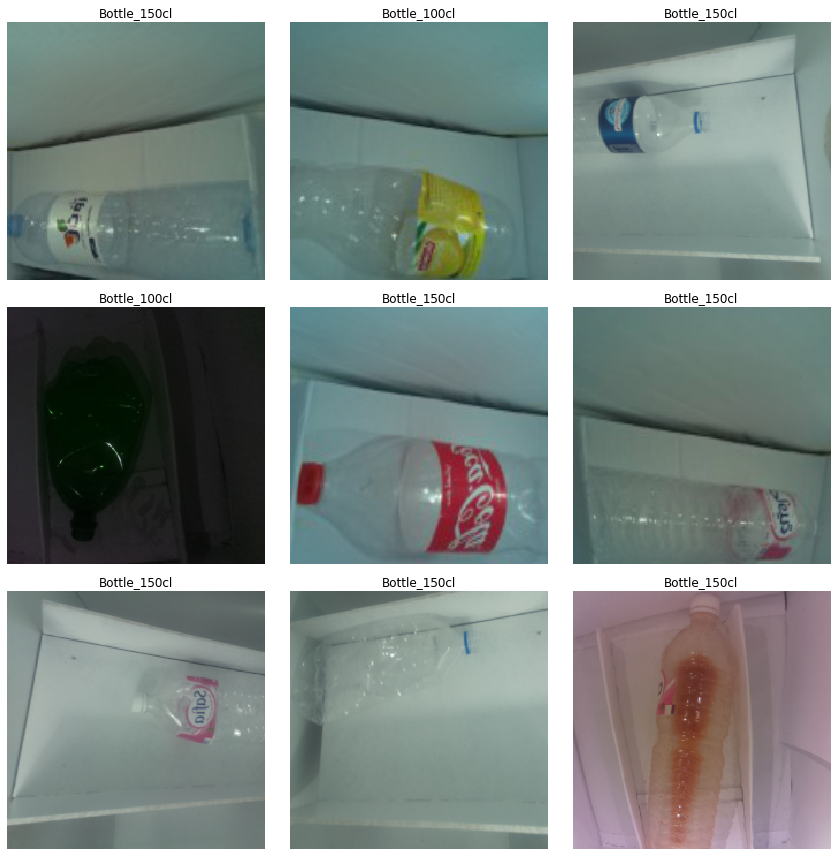

In [0]:
data.show_batch(rows=3)

In [0]:
len(data.classes), len(data.train_ds), len(data.valid_ds)

(8, 914, 161)

In [0]:
fb = FBeta()
fb.average = 'macro'
# We are using fbeta macro average in case some class of birds have less train images

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate,fb],model_dir='./working')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


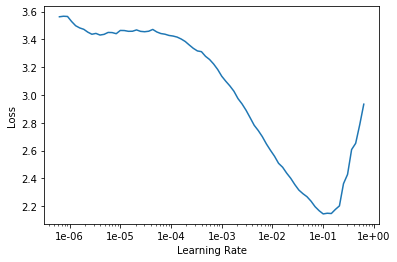

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-2 # learning rate
learn.fit_one_cycle(6,lr,moms=(0.8,0.7))  # moms

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,0.431715,0.369949,0.099379,0.562108,00:19
1,0.427399,0.388138,0.105590,0.588722,00:20
2,0.413177,0.366763,0.099379,0.577027,00:19
3,0.397592,0.407921,0.130435,0.576439,00:20
4,0.379603,0.362618,0.099379,0.594705,00:19
5,0.369208,0.363267,0.111801,0.556128,00:19


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

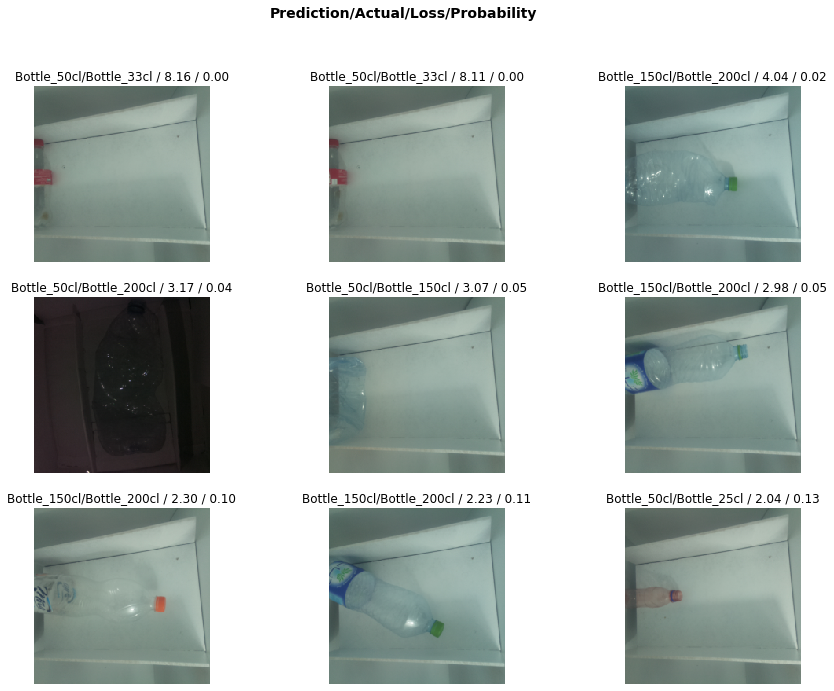

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('Bottle_200cl', 'Bottle_150cl', 4),
 ('Bottle_150cl', 'Bottle_50cl', 3),
 ('Bottle_33cl', 'Bottle_50cl', 2),
 ('Can', 'Bottle_50cl', 2)]